<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%EA%B5%AC%EB%82%B4%EC%8B%9D%EB%8B%B9_%EC%8B%9D%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'

In [3]:
!kaggle competitions download -c 2021mlfinalexamp3

  0% 0.00/393k [00:00<?, ?B/s]
100% 393k/393k [00:00<00:00, 54.5MB/s]
  0% 0.00/2.69k [00:00<?, ?B/s]
100% 2.69k/2.69k [00:00<00:00, 2.37MB/s]
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 54.5MB/s]


In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submit.csv')

In [ ]:
train.head()

,Unnamed: 0,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계
0,0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0
1,1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0
2,2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0
3,3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0
4,4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0


In [ ]:
test.head()

,Unnamed: 0,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,843,2019-07-17,수,2760,96,259,0,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 연두부탕 명엽채...,산채비빔밥 미소장국 야채튀김 아삭고추무침 요플레 포기김치 (김치:국내산),쌀밥/잡곡밥 (쌀:국내산) 두부김치국 돼지고기장조림 야채계란찜 꽃상추무침 열...
1,844,2019-07-18,목,2760,113,274,310,0.0,모닝롤/인절미샌드 우유/주스 계란후라이 녹두죽/쌀밥 (쌀:국내산) 열무된장국 영...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 미니채소떡갈비 모듬묵양념장 참나물생채 ...,쌀밥/잡곡밥 (쌀:국내산) 브로컬리크림스프 옛날왕돈가스 키위드레싱샐러드 찐옥수...
2,845,2019-07-19,금,2760,236,291,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 콩나물국 연근조림...,쌀밥/잡곡밥 (쌀:국내산) 소고기무국 갈치구이 비엔나감자볶음 무생채 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 안동찜닭 해물겨자냉채 간장깻잎지 포기김치 ...
3,846,2019-07-22,월,2760,223,218,438,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 호박젓국찌개 김...,쌀밥/잡곡밥 (쌀:국내산) 매운어묵국 소고기숙주볶음 치킨샐러드 양파짱아찌 포...,쌀밥/잡곡밥 (쌀:국내산) 얼갈이국 오리불고기 두부구이 부추생채/상추쌈 포기...
4,847,2019-07-23,화,2760,206,246,449,0.0,모닝롤/홍루이젠 우유/주스 스크램블에그 닭죽/쌀밥 (쌀:국내산) 감자국 동전문어...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 등갈비김치찜 파프리카잡채 콩나물무침 ...,김밥 맑은국 해물볶음우동 나초콥샐러드 음료 포기김치 (김치:국내산)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      843 non-null    int64  
 1   일자              843 non-null    object 
 2   요일              843 non-null    object 
 3   본사정원수           843 non-null    int64  
 4   본사휴가자수          843 non-null    int64  
 5   본사출장자수          843 non-null    int64  
 6   본사시간외근무명령서승인건수  843 non-null    int64  
 7   현본사소속재택근무자수     843 non-null    float64
 8   조식메뉴            843 non-null    object 
 9   중식메뉴            843 non-null    object 
 10  석식메뉴            843 non-null    object 
 11  중식계             843 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 79.2+ KB


In [5]:
#안쓸 컬럼 없애기
train=train.drop('Unnamed: 0',axis=1)
test=test.drop('Unnamed: 0',axis=1)

In [6]:
#일자 나누기
train['일자']=pd.to_datetime(train['일자'])
test['일자']=pd.to_datetime(test['일자'])

In [7]:
#메뉴 없애기, 사실 이용하면 좋겠지만 그럴 자신이 없음
train=train.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1)
test=test.drop(['조식메뉴','중식메뉴','석식메뉴'],axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              843 non-null    datetime64[ns]
 1   요일              843 non-null    object        
 2   본사정원수           843 non-null    int64         
 3   본사휴가자수          843 non-null    int64         
 4   본사출장자수          843 non-null    int64         
 5   본사시간외근무명령서승인건수  843 non-null    int64         
 6   현본사소속재택근무자수     843 non-null    float64       
 7   중식계             843 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 52.8+ KB


# EDA

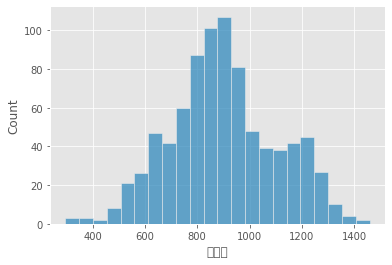

In [ ]:
sns.histplot(data=train,x='중식계')

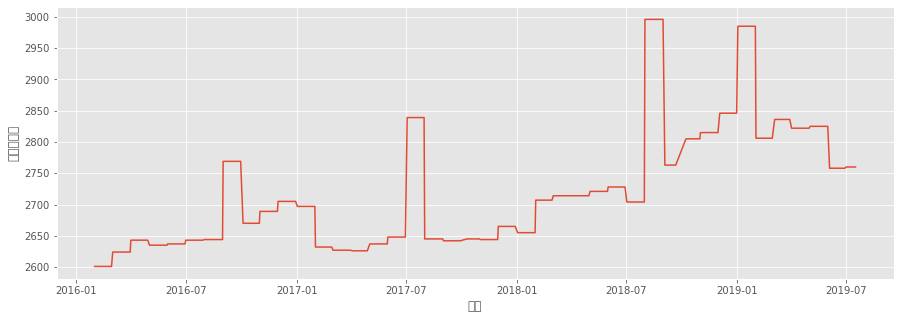

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train,
             x='일자',
             y='본사정원수')

해가 바뀔수록 본사정원수가 늘어나고 있다. 

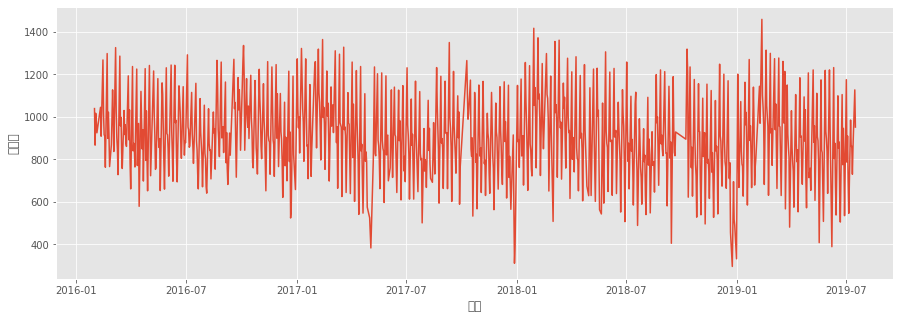

In [10]:
plt.figure(figsize=(15,5))
sns.lineplot(data=train,
             x='일자',
             y='중식계')

그만 알아보도록 하자

In [ ]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계'],
      dtype='object')

In [ ]:
col=['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계']

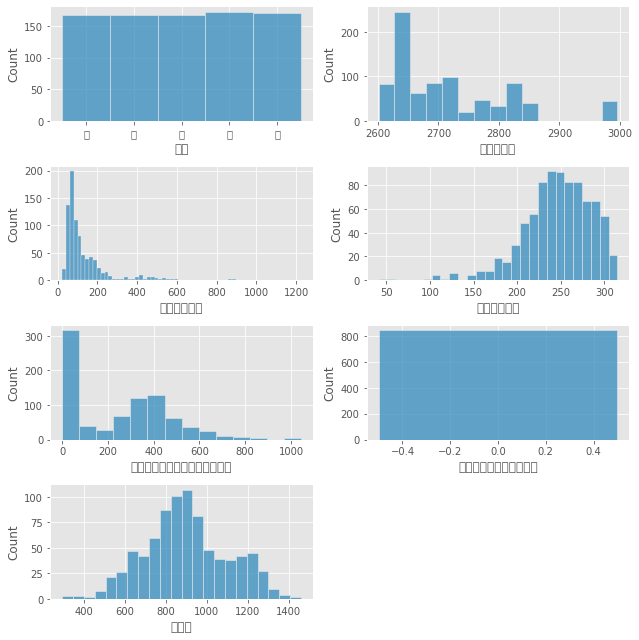

In [ ]:
plt.figure(figsize=(9,9))
for i,colName in enumerate(col):
  plt.subplot(4,2,i+1)
  sns.histplot(train.loc[:,colName])
plt.tight_layout()
plt.show()

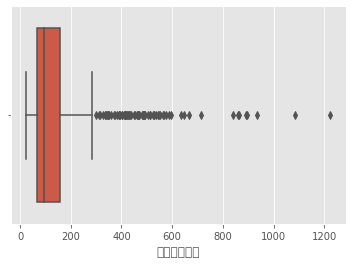

In [ ]:
sns.boxplot(train['본사휴가자수'])

In [ ]:
train['현본사소속재택근무자수'].value_counts()

0.0    843
Name: 현본사소속재택근무자수, dtype: int64

삭제한다

In [8]:
train=train.drop('현본사소속재택근무자수',axis=1)
test=test.drop('현본사소속재택근무자수',axis=1)

In [9]:
#일자 분리
import datetime

train['year']=train['일자'].dt.year
test['year']=test['일자'].dt.year

train['month']=train['일자'].dt.month
test['month']=test['일자'].dt.month

train['day']=train['일자'].dt.day
test['day']=test['일자'].dt.day

In [13]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,중식계,year,month,day
0,2016-02-01,월,2601,50,150,238,1039.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,867.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,1017.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,978.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,925.0,2016,2,5


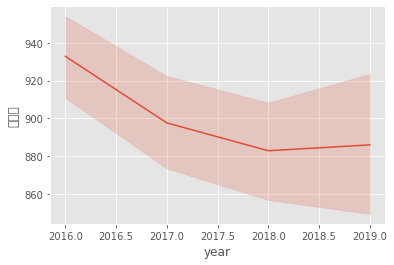

In [ ]:
sns.lineplot(data=train,x='year',y='중식계')

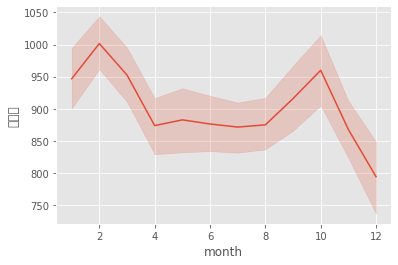

In [ ]:
sns.lineplot(data=train,x='month',y='중식계')

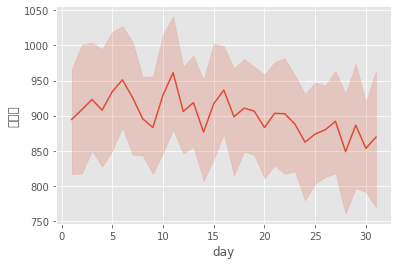

In [ ]:
sns.lineplot(data=train,x='day',y='중식계')

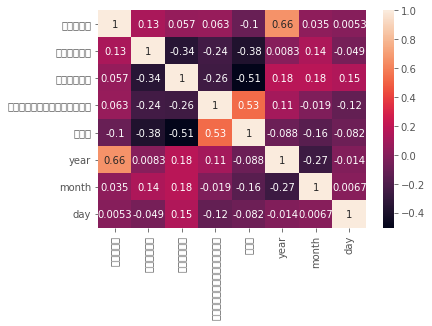

In [ ]:

sns.heatmap(train.corr(),annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

en=LabelEncoder()
train['요일']=en.fit_transform(train['요일'])
test['요일']=en.transform(test['요일'])

display(train)
print()
display(test)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,중식계,year,month,day
0,2016-02-01,3,2601,50,150,238,1039.0,2016,2,1
1,2016-02-02,4,2601,50,173,319,867.0,2016,2,2
2,2016-02-03,2,2601,56,180,111,1017.0,2016,2,3
3,2016-02-04,1,2601,104,220,355,978.0,2016,2,4
4,2016-02-05,0,2601,278,181,34,925.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...
838,2019-07-10,2,2760,123,286,0,862.0,2019,7,10
839,2019-07-11,1,2760,102,301,371,730.0,2019,7,11
840,2019-07-12,0,2760,244,306,0,856.0,2019,7,12
841,2019-07-15,3,2760,144,232,396,1127.0,2019,7,15


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,year,month,day
0,2019-07-17,2,2760,96,259,0,2019,7,17
1,2019-07-18,1,2760,113,274,310,2019,7,18
2,2019-07-19,0,2760,236,291,0,2019,7,19
3,2019-07-22,3,2760,223,218,438,2019,7,22
4,2019-07-23,4,2760,206,246,449,2019,7,23
...,...,...,...,...,...,...,...,...,...
357,2021-01-20,2,2983,75,198,4,2021,1,20
358,2021-01-21,1,2983,92,231,462,2021,1,21
359,2021-01-22,0,2983,255,248,1,2021,1,22
360,2021-01-25,3,2983,107,153,616,2021,1,25


In [11]:
train=train.drop('일자',axis=1)
test=test.drop('일자',axis=1)

- 년도 : 라벨인코딩
- 본사정원수, 본사출장자수, 본사시간외근무명령서승인건수, 본사휴가자수 : minmax

In [16]:
train['year'].value_counts()

3    244
2    239
1    227
0    133
Name: year, dtype: int64

In [48]:
test['year'].value_counts()

2020    232
2019    113
2021     17
Name: year, dtype: int64

In [12]:
mapping={2017:3,2018:2,2016:1,2019:0}

train['year']=train['year'].map(mapping)


In [13]:
mapping={2020:3,2019:2,2021:1}

test['year']=test['year'].map(mapping)

In [51]:
train.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,중식계,year,month,day
0,3,2601,50,150,238,1039.0,1,2,1
1,4,2601,50,173,319,867.0,1,2,2
2,2,2601,56,180,111,1017.0,1,2,3
3,1,2601,104,220,355,978.0,1,2,4
4,0,2601,278,181,34,925.0,1,2,5


In [52]:
test.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,year,month,day
0,2,2760,96,259,0,2,7,17
1,1,2760,113,274,310,2,7,18
2,0,2760,236,291,0,2,7,19
3,3,2760,223,218,438,2,7,22
4,4,2760,206,246,449,2,7,23


스케일링

In [17]:
train.columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '중식계', 'year',
       'month', 'day'],
      dtype='object')

In [14]:
col=['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수']

In [15]:
from sklearn.preprocessing import StandardScaler

st=StandardScaler()
for i in col:
  train[i]=st.fit_transform(train[i].values.reshape(-1,1))
  test[i]=st.transform(test[i].values.reshape(-1,1))

display(train.head())
print()
display(test.head())

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,중식계,year,month,day
0,3,-1.222273,-0.657485,-2.479003,-0.047843,1039.0,1,2,1
1,4,-1.222273,-0.657485,-1.885889,0.326880,867.0,1,2,2
2,2,-1.222273,-0.613350,-1.705376,-0.635371,1017.0,1,2,3
3,1,-1.222273,-0.260266,-0.673873,0.493424,978.0,1,2,4
4,0,-1.222273,1.019661,-1.679588,-0.991588,925.0,1,2,5


,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,year,month,day
0,2,0.438394,-0.319114,0.331843,-1.148879,2,7,17
1,1,0.438394,-0.194063,0.718657,0.285244,2,7,18
2,0,0.438394,0.710713,1.157046,-1.148879,2,7,19
3,3,0.438394,0.615086,-0.725448,0.877399,2,7,22
4,4,0.438394,0.490036,-0.003396,0.928287,2,7,23


In [16]:
X_train=train.drop('중식계',axis=1)
y_train=train['중식계']
X_test=test

In [37]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

estimators=[]

rf=RandomForestRegressor()
estimators.append(rf)

xgb=XGBRegressor()
estimators.append(xgb)

etr=ExtraTreesRegressor()
estimators.append(etr)

#모듈의 파라미터들을 할당할 리스트 만들어주기
params=[]

params_rf={'n_estimators':[90,100,110,120],
           'min_samples_split':[1,2,3,4]}
params.append(params_rf)

params_xgb={'n_estimatros':[100,300,500],
            'learning_rate':[0.05,0.1,0.3],
            'max_depth':[3,5,7],
            'subsample':[0.1,0.3]}

params.append(params_xgb)

params_etr={
    'n_estimators':[50,60,70,80,90,100,110,120,130,140,150]
}
params.append(params_etr)

In [38]:
from tqdm.auto import tqdm#진행도를 확인하는 것

def gridSearchCV(models,params):
  best_models=[]

  for i in tqdm(range(0,len(models))):
    model_grid=GridSearchCV(models[i],params[i],n_jobs=-1,verbose=1,cv=5)
    model_grid.fit(X_train,y_train)
    best_models.append(model_grid.best_estimator_)
  return best_models


best_model_list=gridSearchCV(estimators,params)

  0%|          | 0/3 [00:00<?, ?it/s]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[11:10:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 5 folds for each of 11 candidates, totalling 55 fits


In [39]:
best_model_list

[RandomForestRegressor(n_estimators=120),
 XGBRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100, subsample=0.3),
 ExtraTreesRegressor(n_estimators=140)]

In [18]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


In [20]:
best_models=[
             ('rf',RandomForestRegressor(n_estimators=120)),
             ('xgb',XGBRegressor(learning_rate=0.05, max_depth=7, n_estimatros=100, subsample=0.3)),
             ('ex',ExtraTreesRegressor(n_estimators=140))
]

from sklearn.ensemble import VotingRegressor

voting_rg=VotingRegressor(estimators=best_models)
voting_rg.fit(X_train,y_train)

[13:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=120)),
                            ('xgb',
                             XGBRegressor(learning_rate=0.05, max_depth=7,
                                          n_estimatros=100, subsample=0.3)),
                            ('ex', ExtraTreesRegressor(n_estimators=140))])

In [21]:
pred=voting_rg.predict(X_test)

In [22]:
sample

,Id,중식계
0,843,0
1,844,0
2,845,0
3,846,0
4,847,0
...,...,...
357,1200,0
358,1201,0
359,1202,0
360,1203,0


In [23]:
submit=sample.copy()
submit['중식계']=pred
submit

,Id,중식계
0,843,871.502431
1,844,806.112316
2,845,579.435161
3,846,1085.053870
4,847,927.033815
...,...,...
357,1200,893.689378
358,1201,884.749184
359,1202,644.051664
360,1203,1233.567736


In [24]:
submit.to_csv('sample.csv',index=False)

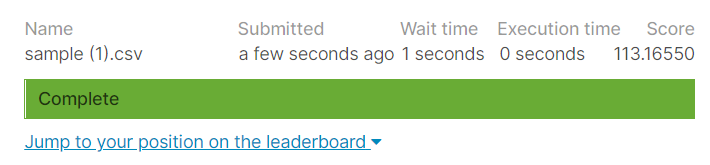